#### Examples_Binary.ipynb

In this notebook, we set up a a simple binary system, with no Dark Matter. We then evolve for a number of orbits and plot the orbital properties over time.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

from NbodyIMRI import tools, particles, simulator, reader
from NbodyIMRI import units as u
from NbodyIMRI import distributionfunctions as DF
import NbodyIMRI

#### Setting up the system parameters

We'll specify the system based on it's initial semi-major axis and eccentricity:


In [3]:
M_1 = 1e6*u.Msun
M_2 = 1*u.Msun

r_isco = tools.calc_risco(M_1)

a_i = 100*r_isco
e_i = 0.0

#### Generating initial conditions

> Particle set:
>     M_1 [M_sun] = 1000000.0
>     M_2 [M_sun] = 1.0
>     (a [pc], e) = (2.8672733333333327e-05, 0.0)


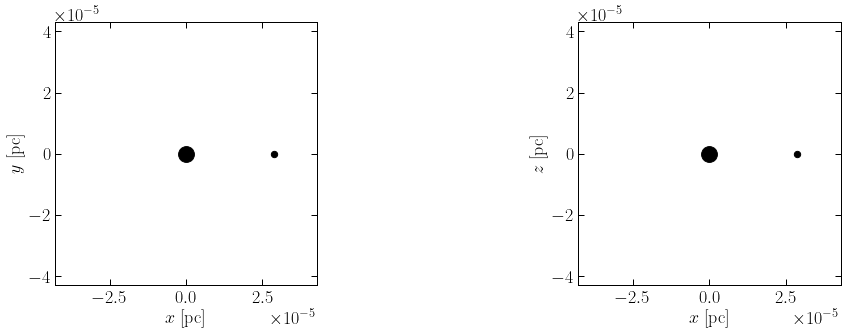

In [4]:
p_binary = particles.particles_in_binary(M_1, M_2, a_i, e_i, dynamic_BH=True)

p_binary.summary()
p_binary.plot()

#### Setting up the simulator and simulation parameters

We'll set up the simulator and run for 100 orbits, with 10 timesteps per orbit

In [5]:
sim = simulator.simulator(p_binary)


T_orb = p_binary.T_orb()
N_step_per_orb = 10
N_orb = 100

t_end = T_orb*N_orb
dt    = T_orb/N_step_per_orb

sim.run_simulation(dt, t_end, show_progress=True)

  3%|▎         | 27/1000 [00:00<00:04, 224.05it/s]

> Simulating...


100%|██████████| 1000/1000 [00:00<00:00, 1539.85it/s]

> Simulation completed.


Now we'll plot the properties of the binary over time and the trajectory.

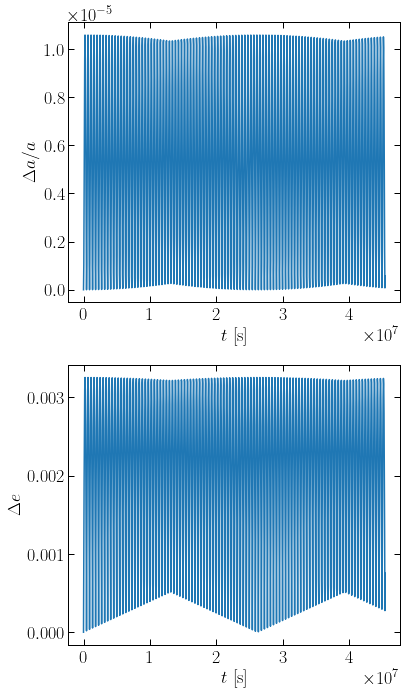

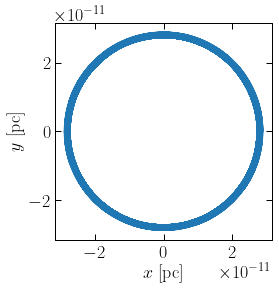

In [6]:
sim.plot_orbital_elements();
sim.plot_trajectory();

Here, we see that the average separation of the binary is stable over long time periods, but it seems to oscillate or precess. Let's decrease the timestep to resolve this:

  0%|          | 468/100000 [00:00<00:42, 2365.07it/s]

> Simulating...


100%|██████████| 100000/100000 [00:40<00:00, 2486.57it/s]


> Simulation completed.


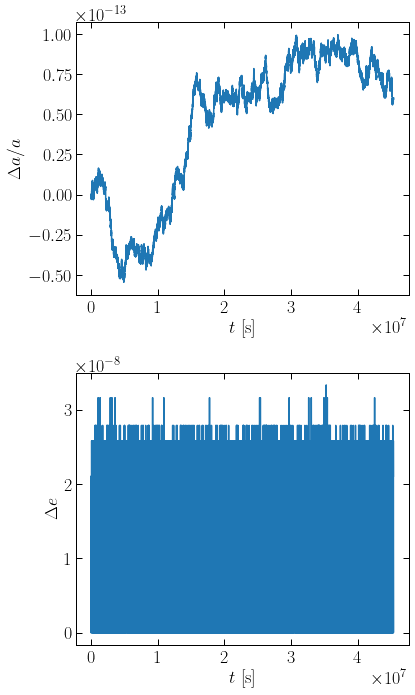

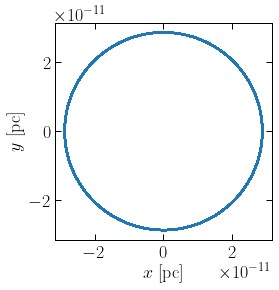

In [7]:
sim = simulator.simulator(p_binary)
sim.run_simulation(0.01*dt, t_end, show_progress=True)
sim.plot_orbital_elements();
sim.plot_trajectory();

That's better!

We can also compare different methods for calculating the leapfrog timestep. A simple second order time-step ("DKD" or "Drift-Kick-Drift") is fast, but it gives rather large errors:

100%|██████████| 1000/1000 [00:00<00:00, 9322.87it/s]

> Simulating...
> Simulation completed.


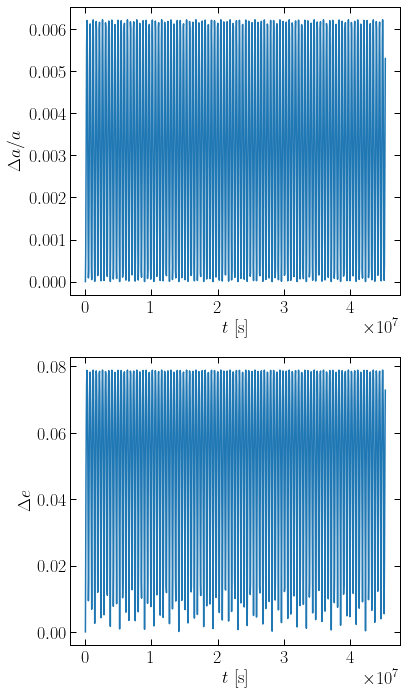

In [8]:
sim.run_simulation(dt, t_end, show_progress=True, method='DKD')
sim.plot_orbital_elements();

Instead, the default is a higher order time-step method called the "Position Extended Forest-Ruth Like" leapfrog (or "PEFRL"):

 26%|██▌       | 261/1000 [00:00<00:00, 2604.95it/s]

> Simulating...


100%|██████████| 1000/1000 [00:00<00:00, 2468.57it/s]


> Simulation completed.


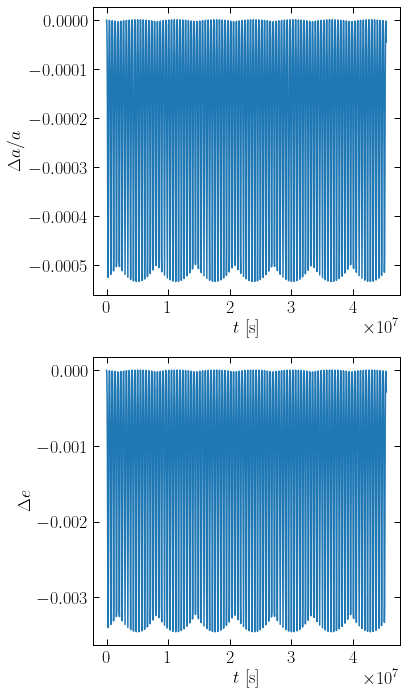

In [9]:
sim.run_simulation(dt, t_end, show_progress=True, method='PEFRL')
sim.plot_orbital_elements();